In [462]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

In [463]:
df = pd.read_csv(r"./Heart_Disease_Prediction.csv")
df1 = df.copy()
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [465]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


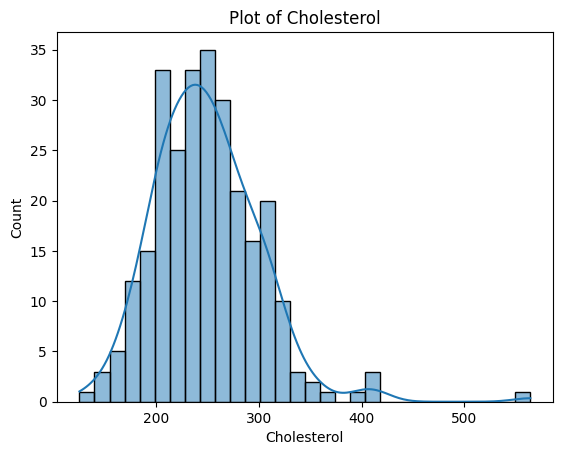

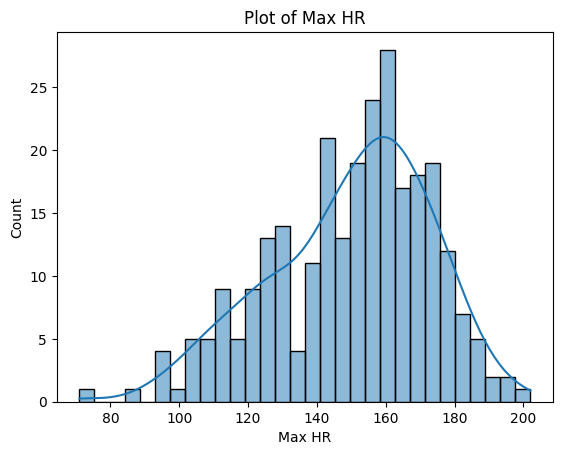

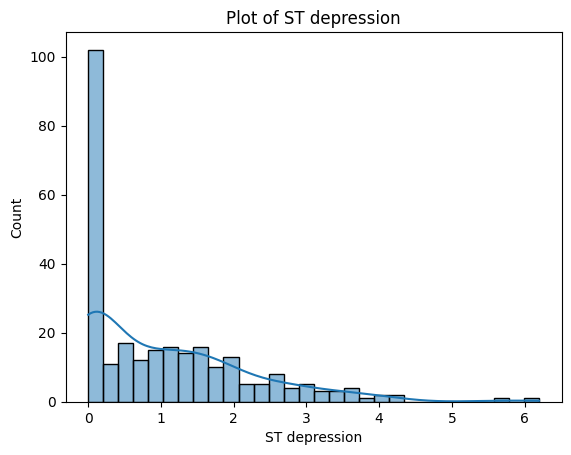

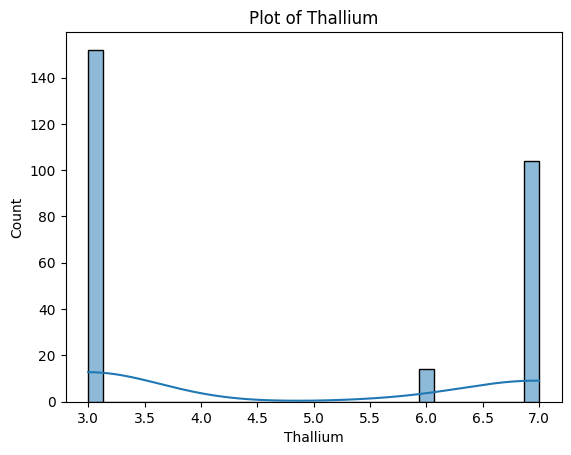

In [466]:
for col in ['Cholesterol','Max HR','ST depression','Thallium']:
    sns.histplot(df[col],bins=30,kde=True)
    plt.title(f'Plot of {col}')
    plt.show()

In [467]:
df['Cholesterol']=df['Cholesterol'].astype(float)
df['Max HR'] = df['Max HR'].astype(float)
df['ST depression'] = df['ST depression'].astype(float)

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    float64
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    float64
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(3), int64(10), 

In [469]:
df.loc[:,'Cholesterol'] = np.log(df['Cholesterol'].astype(float))
#df.loc[:,'Max HR'] = np.sqrt(df['Max HR'].astype(float))
#df.loc[:,'ST depression'] = np.sqrt(df['ST depression'].astype(float))
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='box-cox')
df.loc[:,'ST depression'] = scaler.fit_transform(df[['ST depression']]+1)
df.loc[:,'Max HR'] = scaler.fit_transform(df[['Max HR']])
import category_encoders as ce
encoder = ce.OrdinalEncoder()
df.loc[:,'Heart Disease'] = encoder.fit_transform(X=df['Heart Disease'])
df['Heart Disease'] = df['Heart Disease'].astype(int)

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    float64
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    float64
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int32  
dtypes: float64(3), int32(1), i

In [471]:
df.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
Age,1.000000,-0.094401,0.096920,0.273053,0.213916,0.123458,0.128171,-0.420804,0.098297,0.234195,0.159774,0.356081,0.106100,-0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.172694,0.042140,0.039253,-0.062415,0.180022,0.102776,0.050545,0.086830,0.391046,-0.297721
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.084004,-0.098537,0.074325,-0.322531,0.353160,0.165136,0.136900,0.225890,0.262659,-0.417436
BP,0.273053,-0.062693,-0.043196,1.000000,0.182584,0.155681,0.116157,-0.041413,0.082793,0.185173,0.142472,0.085697,0.132045,-0.155383
Cholesterol,0.213916,-0.172694,0.084004,0.182584,1.000000,0.025237,0.166485,-0.032568,0.090810,0.032932,-0.009452,0.132249,0.021567,-0.131493
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025237,1.000000,0.053499,0.017097,-0.004107,-0.010149,0.044076,0.123774,0.049237,0.016319
EKG results,0.128171,0.039253,0.074325,0.116157,0.166485,0.053499,1.000000,-0.084889,0.095098,0.110686,0.160614,0.114368,0.007337,-0.182091
Max HR,-0.420804,-0.062415,-0.322531,-0.041413,-0.032568,0.017097,-0.084889,1.000000,-0.384529,-0.402229,-0.384476,-0.272087,-0.261241,0.418254
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.090810,-0.004107,0.095098,-0.384529,1.000000,0.276572,0.255908,0.153347,0.321449,-0.419303
ST depression,0.234195,0.102776,0.165136,0.185173,0.032932,-0.010149,0.110686,-0.402229,0.276572,1.000000,0.616846,0.240075,0.335816,-0.406929


In [472]:
y = df['Heart Disease']
x = df.drop(columns=['Heart Disease','ST depression'])

In [473]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
y = np.array(y)
x = np.array(x)
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.fit_transform(x_test)
lr = LogisticRegression()
lr.fit(x_train_s,y_train)
y_pred = lr.predict(x_test_s)
print("Acurracy: ",accuracy_score(y_pred,y_test))

Acurracy:  0.8703703703703703


In [474]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtg = DecisionTreeClassifier(random_state=2)
params = {
    'max_depth':[2,3,5,7,9,11,8]
}
dtg = GridSearchCV(dtg, param_grid=params,cv=5, n_jobs=-1)
dtg.fit(x_train,y_train)
y_pred = dtg.best_estimator_.predict(x_test)
print("Best params: ",dtg.best_params_)
print("Acurracy: ",accuracy_score(y_pred,y_test))


Best params:  {'max_depth': 3}
Acurracy:  0.9259259259259259
